In [5]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://guba.eastmoney.com/list,hk01810.html'
driver.get(url)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [10]:
try:
    next_page=driver.find_element('class name','nextp')
    next_page.click()
except NoSuchElementException:
    print("NoSuchElementException")

In [62]:
table =driver.find_element('class name','listbody')

In [63]:
table.text

'98\n1\n作为小米的销售就是好，业绩完全不用自己去做，老板已经给完成了八成，网络博主完成两\n港股通ATM提款机\n03-03 11:31\n178\n1\n小米集团港股股价预测的格局需要依据汽车消费市场情绪对小米汽车的高度认可，客观的小\n大道兮至简\n03-03 11:31\n6522\n29\n半夜醒来，看了下大家的评论，目前多空双方分歧严重，但是看多的人远多于看空的人，看\n爱钓鱼的姜子牙\n03-03 11:30\n112\n1\n说实话，我是米粉，一直看好小米，也一直对消息持乐观态度，但今天普涨情况下，小米一\n股友63212A023o\n03-03 11:29\n25.7万\n666\n资讯雷军超钟睒睒登顶中国首富 身家近4400亿元\n小米集团-W资讯\n03-03 11:27\n69\n0\n似乎是买入机会，下午再看看。\n我是踏空狗\n03-03 11:27\n25\n0\n估值反应一年的预期了，回购才能突破\n跑步的蚂蚁1\n03-03 11:27\n68\n0\n都是炒股赚点钱，留下点理智吧!当然，有人买多，有人买空，都符合市场逻辑。为了黑而\n布衣以头抢地耳\n03-03 11:26\n2585\n9\n小米发布会有感，万亿小米刀下魂又要多一个\n我是踏空狗\n03-03 11:26\n1397\n5\n转发财联社小米股价新高后为何巨震？百亿空头或正遭外资“极限逼仓”财联社8分钟前约\n坚持满仓\n03-03 11:26\n73\n0\n这股做空的都国内的耐心资本，国外的黑心资本家都是在买进持有\n宏图成章的千道流\n03-03 11:24\n73\n0\n小米这一波外资炒起来的，看看我们内资，挂了多少空单，一直被外资逼空，诶。\n远离股市2\n03-03 11:24\n250\n2\n小米SU7Ultra作为一款高端新能源汽车，凭借其强大的性能、豪华配置以及极具竞\n布衣以头抢地耳\n03-03 11:23\n240\n4\n同行比亚迪才1万亿左右市值，小米造车+手机1.3万亿了，没造车之前也就是3千亿左\n精准打击\n03-03 11:23\n64\n0\n洗几天也挺好，洗下来让我买入，埋伏YU7\n大道必简\n03-03 11:22\n68\n0\n空苟拼命在唱空，可惜呀！\n二五年赚二十万\n03-03 11:22\n146\

In [52]:
# Extract table rows
rows = table.find_elements(By.TAG_NAME, 'tr')

# Initialize lists to store data
data = []

# Loop through rows and extract data
for row in rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    if cells:  # Skip rows without data (e.g., headers)
        row_data = [cell.text for cell in cells]
        data.append(row_data)

df = pd.DataFrame(data)


In [53]:
df

,0,1,2,3,4
0,107,1,尊敬的小米集团董秘：你好！想问一下集团的电子邮箱在正常使用吗？为什么我给雷军董事,轻快的乔伟涛,03-03 15:33
1,79,0,明天就去香港开户等我来接盘,梭哈打板,03-03 15:33
2,85,0,新高后回调很正常，参考纳斯达克。,纳斯达克1,03-03 15:31
3,128,2,小米汽车大卖挡不住股价暴跌,king3660,03-03 15:31
4,74,0,发利好是为了套人的？,Vincycwx,03-03 15:31
...,...,...,...,...,...
75,98,2,大家准备好，我要拉了，谁有纸巾谢谢,股友56c68z6568,03-03 14:43
76,113,1,看不懂，超大单在进怎么反而绿了,否极泰来来来来,03-03 14:42
77,61,0,真诚感动一切，来点人给雷军站岗,小白菜菜菜菜菜菜,03-03 14:42
78,162,3,高位三只乌鸦，懂的都懂，之前提示过风险结果被喷,左满舵,03-03 14:42


In [56]:
string_list=[]

i=0

while i<2:
    table=driver.find_element('class name','listbody')#.text
    # Extract table rows
    rows = table.find_elements(By.TAG_NAME, 'tr')

    # Initialize lists to store data
    data = []

    # Loop through rows and extract data
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, 'td')
        if cells:  # Skip rows without data (e.g., headers)
            row_data = [cell.text for cell in cells]
            data.append(row_data)

    df = pd.DataFrame(data)
    string_list.append(df)
    #driver.refresh()
    try:
        next_page=driver.find_element('class name','nextp')
        next_page.click()
        i+=1
    except NoSuchElementException:
        break

In [74]:
driver.quit()

In [78]:
df_full=pd.concat(string_list)
df_full.columns=['阅读',
'评论',
'标题',
'作者',
'最后更新']

In [79]:
df_full.describe()

,阅读,评论,标题,作者,最后更新
count,160,160,160,160,160
unique,80,13,158,129,93
top,64,0,压不住啦量太大。空头没赚的空间,小米集团-W资讯,03-03 14:13
freq,8,108,2,7,7


In [81]:
df_full['阅读']=pd.to_numeric(df_full['阅读'])

df_full['评论']=pd.to_numeric(df_full['评论'])

In [84]:
df_full.describe()

,阅读,评论
count,160.000000,160.000000
mean,270.825000,1.531250
std,815.664752,5.427535
min,25.000000,0.000000
25%,63.000000,0.000000
50%,70.000000,0.000000
75%,100.250000,1.000000
max,6018.000000,55.000000


array([[<AxesSubplot:title={'center':'阅读'}>,
        <AxesSubplot:title={'center':'评论'}>]], dtype=object)

C:\Users\Ray Ge\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38405 (\N{CJK UNIFIED IDEOGRAPH-9605}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ray Ge\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35835 (\N{CJK UNIFIED IDEOGRAPH-8BFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ray Ge\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ray Ge\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


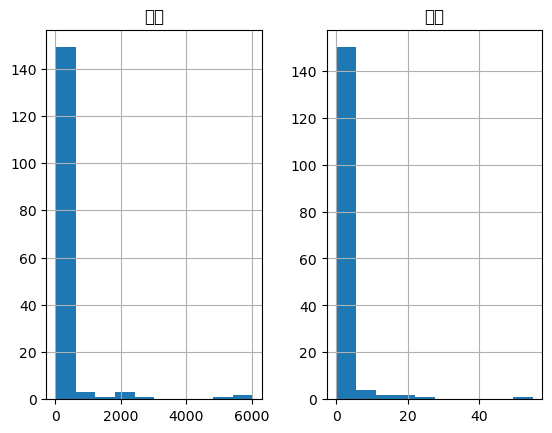

In [85]:
df_full.hist()